## Example:

x's: {1, 2, 3, 4, 5}

y's: {1, 2, 1.3, 3.75, 2.25}

We want to find a straight line $y = mx + b$ that best fits this data set. The cost function is:

$J(m, b) = \frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$,

where $n$ is the number of training examples, $(x^{(i)}, y^{(i)})$ represents the $i$-th pair of $x$ and $y$.

Goal: Find values for $m$ and $b$ that minimize the cost function.

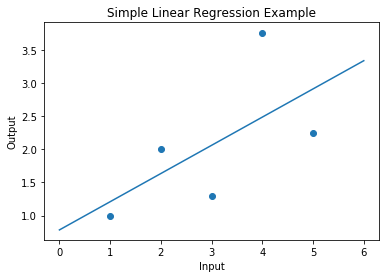

In [39]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xs1 = np.array([1,2,3,4,5]) # input
ys1 = np.array([1,2,1.3,3.75,2.25]) # output

# create a scatterplot
plt.scatter(xs1,ys1)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Simple Linear Regression Example')

# plot y = mx + b with m = 0.425, b = 0.785
x_coord = np.array([0,6])
y_coord = x_coord * 0.425 + 0.785
plt.plot(x_coord,y_coord)

## Method 1: Analytical Solution.

The cost function $J(m, b)$ is a quadratic funtion on $m$ and $b$. It can be written in the form of $Am^2 + Bmb + Cb^2 + Dm + Eb + F$. Using algebra we can show that the coefficients $A, B, ..., F$ can be calculated as:

1. $A = \frac{1}{n}\sum_{i=1}^{n}\big(x^{(i)}\big)^2$.
2. $B = \frac{1}{n}\sum_{i=1}^{n}2x^{(i)}$.
3. $C = 1$.
4. $D = -\frac{1}{n}\sum_{i=1}^{n}2x^{(i)}y^{(i)}$.
5. $E = -\frac{1}{n}\sum_{i=1}^{n}2y^{(i)}$.
6. $F = \frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)}\big)^2$.

At the minimum of $J(m, b)$, partial derivatives $\frac{\partial J}{\partial m} = \frac{\partial J}{\partial b} = 0$. Thus

1. $\frac{\partial J}{\partial m} = 2Am + Bb + D = 0$.
2. $\frac{\partial J}{\partial b} = Bm + 2Cb + E = 0$.

This is a linear system of equations. Its solution $(m, b)$ will give the slope and y-intercept of the regression line.

In [40]:
import numpy as np
# Store training data with numpy arrays.
xs = np.arange(1, 6, 1)
ys = np.array([1, 2, 1.3, 3.75, 2.25])
n = len(xs)
print('xs:', xs)
print('ys:', ys)
print('n:', n)

xs: [1 2 3 4 5]
ys: [ 1.    2.    1.3   3.75  2.25]
n: 5


In [41]:
# Calculate coefficients A to F.
A = (np.sum(xs**2))/n
B = (np.sum(2*xs))/n
C = 1
D = -(np.sum(2*xs*ys))/n
E = -(np.sum(2*ys))/n
F = (np.sum(ys**2))/n
print(A, B, C, D, E, F)

11.0 6.0 1 -14.06 -4.12 5.163


In [42]:
# Construct linear system of equations Uz = v, z = [m b]^T
# U = [2A B ]   v = [-D]
#     [B  2C]       [-E]
U = [[2*A,B], [B, 2*C]]
v = [[-D],[-E]]

# Use numpy.linalg.solve() to solve this linear system of equations
z = np.linalg.solve(U, v)
print('(m, b):', z)

(m, b): [[ 0.425]
 [ 0.785]]


In [43]:
# Compare the results with LinearRegression from sklearn:
# Use sklearn.linear_model.LinearRegression.fit() to fit linear model to xs, ys
# print the intercept and slope

import sklearn.linear_model
lm = sklearn.linear_model.LinearRegression()

# fit() requires a 2D array for input, each row representing a data example.
# so we need reshape() to reshape xs and ys (matrix with 1 column)
lm.fit(xs.reshape([n,1]),ys.reshape([n,1]))


print('Results from sklearn:')
print('slope:', lm.coef_)
print('y-intercept:', lm.intercept_)


Results from sklearn:
slope: [[ 0.425]]
y-intercept: [ 0.785]


#### Normal Equation for Linear Regression
The vector $z=(m,b)$ can be obtained directly from x's and y's through the following equation:

$z = (X^T X) ^ {-1} X^T y$.

Here each row of $x$ and $y$ represents a training example. In order to reflect the constant term of linear expression, X should include a second column filled with 1.

This formula is call the **normal equation** of linear regression. It generalizes to the multivariate case, where $X$ may have more than one column. Derivation of normal equation can be found here:https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression



In [44]:
# Use normal equation to find the regression line.
# use numpy.array.reshape() to convert xs and ys into column vectors
xs2 = xs.reshape([n,1])
ys2 = ys.reshape([n,1])


# add a column of 1 to xs
X = np.concatenate([xs2, np.ones([5,1])], axis =1)
print(X)
print('xs:', xs)
print('ys:', ys)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]]
xs: [1 2 3 4 5]
ys: [ 1.    2.    1.3   3.75  2.25]


In [45]:
# Apply the normal equation
# Perform matrix multiplication with .dot()
# Perform matrix transpose with .T
# Perform matrix inversion with numpy.linalg.inv()

z = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(ys2)

print('Results from applying normal equation:')
print('slope:', z[0])
print('y-intercept:', z[1])

Results from applying normal equation:
slope: [ 0.425]
y-intercept: [ 0.785]


## Method 2: (Batch) Gradient Descent
The analytical method involves solving linear system of equations, which has complexity $O(n^3)$. When the size of data set is large (>1 million), this method is going to take a long time to find the results. Also, not every machine learning model has a formula that directly computes the best values for parameters. *Gradient Descent* is an optimization method that is suitable for most machine learning models.

In [46]:
import numpy as np

# Load training data
xs = np.arange(1, 6, 1)
ys = np.array([1, 2, 1.3, 3.75, 2.25])
n = len(xs)

# Visualize the cost function
ms = np.arange(-1, 2, 0.2)
bs = np.arange(-20, 20, 0.2)
ms, bs = np.meshgrid(ms, bs) # create a coordinate matrix
print('shape of coordinate matrix:', ms.shape, bs.shape)

# Compute the cost for each (m, b) pair 
costs = sum([(ms * x + bs - y) ** 2 for x in xs for y in ys]) / n
print('costs:', costs)
print('shape of costs:', costs.shape) 

print(ms)
print(bs)

shape of coordinate matrix: (200, 15) (200, 15)
costs: [[ 3154.615  3002.455  2854.695 ...,  1619.095  1519.735  1424.775]
 [ 3104.695  2953.735  2807.175 ...,  1583.575  1485.415  1391.655]
 [ 3055.175  2905.415  2760.055 ...,  1548.455  1451.495  1358.935]
 ..., 
 [ 1042.775  1127.015  1215.655 ...,  2344.055  2481.095  2622.535]
 [ 1071.655  1157.095  1246.935 ...,  2387.335  2525.575  2668.215]
 [ 1100.935  1187.575  1278.615 ...,  2431.015  2570.455  2714.295]]
shape of costs: (200, 15)
[[-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]
 [-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]
 [-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]
 ..., 
 [-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]
 [-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]
 [-1.  -0.8 -0.6 ...,  1.4  1.6  1.8]]
[[-20.  -20.  -20.  ..., -20.  -20.  -20. ]
 [-19.8 -19.8 -19.8 ..., -19.8 -19.8 -19.8]
 [-19.6 -19.6 -19.6 ..., -19.6 -19.6 -19.6]
 ..., 
 [ 19.4  19.4  19.4 ...,  19.4  19.4  19.4]
 [ 19.6  19.6  19.6 ...,  19.6  19.6  19.6]
 [ 19.8  19.8  19.8 ...,  19.8  19.8  19

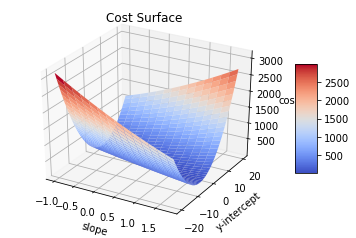

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Create a new matplotlib.figure.Figure and add a new axes to it of type Axes3D:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
from matplotlib import cm
surf = ax.plot_surface(ms, bs, costs, cmap=cm.coolwarm)

# customize the figure
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('cost')
ax.set_title('Cost Surface')


# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

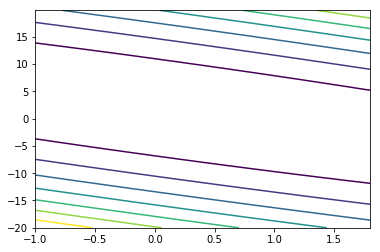

In [48]:
# Draw a contour plot
plt.figure()
CS = plt.contour(ms, bs, costs)
plt.show()

### Gradient Descent Algorithm

repeat until converge{

    parameter = paramter - learning rate * gradient
    
}

1. Gradient is the vector of partial derivatives
2. Parameters should be updated simultanously.
3. Stopping criterion: set a maximum number of iteration, or stop when the different between the new cost and the previous cost is less than a threshold (e.g. $10^{-6}$)

For cost function 

$J(m, b) = \frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$,

its gradient is $(\frac{\partial J}{\partial m}, \frac{\partial J}{\partial b})$, and

$\frac{\partial J}{\partial m} = \frac{1}{n}\sum_{i=1}^{n} 2x^{(i)}(mx^{(i)} + b - y^{(i)})$,

$\frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} 2(mx^{(i)} + b - y^{(i)})$.

In [49]:
# Implementation of the gradient descent algorithm

# hyper-parameters:
r = 0.01  # learning rate - step size
threshold = 1e-6  # convergence threshold
maxiter = 3000  # maximun iteration

m, b = 0, 0  # initial choice of parameters
cost_history = np.zeros(maxiter+1)
cost_history[0] = sum((m * xs + b - ys)**2) / n  # cost
i = 0  # iteration index

print('cost history:', cost_history[0])
while (i < maxiter ):
    i += 1
    # compute the partial derivate with respect to m
    gradient_m = sum(2 * xs * (m * xs + b - ys)) / n
    # update m
    new_m = m - r * gradient_m
    # compute the partial derivative with respect to b
    gradient_b = sum(2 * (m * xs + b - ys)) / n
    # update b
    new_b = b - r * gradient_b
    # update m, b, and cost
    m, b = new_m, new_b
    cost_history[i] = sum((m * xs + b - ys)**2) / n
    if i % 100 == 0:
        print('iteration:', i, 'cost:', cost_history[i], 'm, b:', m, b)
print('Gradient descent completed. m, b:', m, b)

cost history: 5.163
iteration: 100 cost: 0.593660914939 m, b: 0.547342962215 0.343303087188
iteration: 200 cost: 0.576188385556 m, b: 0.512196066367 0.470194533252
iteration: 300 cost: 0.56731291101 m, b: 0.487146230991 0.560632387232
iteration: 400 cost: 0.562804459675 m, b: 0.469292755249 0.625089099534
iteration: 500 cost: 0.560514313573 m, b: 0.456568256615 0.671028577065
iteration: 600 cost: 0.559350994113 m, b: 0.447499273755 0.703770482762
iteration: 700 cost: 0.558760065804 m, b: 0.441035643833 0.72710623768
iteration: 800 cost: 0.558459893513 m, b: 0.436428896592 0.743738056934
iteration: 900 cost: 0.558307415788 m, b: 0.433145583593 0.75559185865
iteration: 1000 cost: 0.558229962082 m, b: 0.430805506379 0.764040279895
iteration: 1100 cost: 0.558190618127 m, b: 0.429137690557 0.770061624206
iteration: 1200 cost: 0.558170632683 m, b: 0.427949007723 0.774353146404
iteration: 1300 cost: 0.558160480729 m, b: 0.427101811731 0.777411792751
iteration: 1400 cost: 0.558155323868 m, b: 

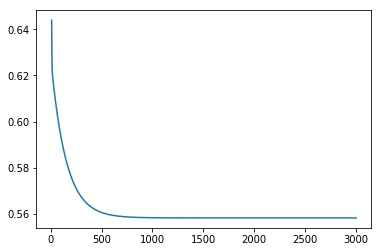

In [50]:
# plot the change of costs
init = 10
plt.plot(np.arange(init, maxiter+1), cost_history[init:])

### Discussion
1. What will gradient descent do if already at the minimum?
2. What will happen if the learning rate is too large or too small?
3. Will gradient descent guarantee to find a global minimum for any type of cost function? local minimum?
4. For which type of cost function will gradient descent guarantee to find its global minimum?

In [ ]:
# Q1: the rate of descent would be the zero vector; return minimum point
# Q2: too small- gradient descent would run too slowly; might not have enough iterations to reach the minimum point;
    # can reflect graphically as linear
    # too large- overstepping; may skip minimum point and bounce back and forth on the curve; also a possibility to 
    # jump off the curve; can also reflect graphically as an increase in cost
# Q3: No, no. If there are several local minima, there is no guarantee that the minimum that gradient descent returns will 
    # be a global minimum. There is also a possibility of returning a maximum point (saddle points)
# Q4: convex functions; as long as the step size is not too large, it will guarantee the global minimum

## Method 3: Stochastic Gradient Descent
When the dataset is extremely large (> 1 million samples, each with hundreds of features), even gradient descent algorithm is too costly. Researchers have found that gradient descent will become much more efficient if the gradient and the cost is approximated by that of a single randomly-chosen data example. This variation of gradient descent algorithm is called **stochastic gradient descent** (SGD).

In [ ]:
# Implement the stochastic gradient descent algorithm, and then illustrate the training process
# hint: use numpy.random.randint(n) to generate a random index between 0 and n-1
# hint: store the value of cost function after each iteration, and plot the values after training
# hint: if your training results is not satisfactory, try changing the learning rate and the stop criterion


In [62]:
# randomly choose one data example
# replace summation with the term associated with chosen index
# as iterations occur, reduce learning rate to control randomness; not too rapidly

r_init = 0.01  # learning rate - step size
threshold = 1e-6  # convergence threshold
maxiter = 30000  # maximun iteration

m, b = 0, 0  # initial choice of parameters
cost_history = np.zeros(maxiter+1)
cost_history[0] = (m * x + b - y)**2  # cost
i = 0  # iteration index

print('cost history:', cost_history[0])
while (i < maxiter ):
    i += 1
    # compute learning rate
    r = r_init/np.log(i+1)
    #random data point
    q = np.random.randint(n)
    x = xs[q]
    y = ys[q]
    # compute the partial derivate with respect to m
    gradient_m = 2 * x * (m * x + b - y)
    # update m
    new_m = m - r * gradient_m
    # compute the partial derivative with respect to b
    gradient_b = 2 * (m * x + b - y)
    # update b
    new_b = b - r * gradient_b
    # update m, b, and cost
    m, b = new_m, new_b
    cost_history[i] = (m * x + b - y)**2
    if i % 1000 == 0:
        print('iteration:', i, 'cost:', cost_history[i], 'm, b:', m, b)
print('Gradient descent completed. m, b:', m, b)

cost history: 1.0
iteration: 1000 cost: 0.370093869199 m, b: 0.487084963219 0.422928592045
iteration: 2000 cost: 0.21668484953 m, b: 0.485535753593 0.56343429357
iteration: 3000 cost: 0.0173847392273 m, b: 0.487255925987 0.644595275097
iteration: 4000 cost: 0.0172980927177 m, b: 0.436225512125 0.695296701656
iteration: 5000 cost: 0.117960488083 m, b: 0.466555082798 0.723436070291
iteration: 6000 cost: 0.522932618008 m, b: 0.430770664717 0.730828806804
iteration: 7000 cost: 0.612386928134 m, b: 0.45625900525 0.751256523575
iteration: 8000 cost: 0.210183481231 m, b: 0.391560920129 0.750653119575
iteration: 9000 cost: 0.884682084867 m, b: 0.484637122022 0.786664034882
iteration: 10000 cost: 0.462552224504 m, b: 0.404821851181 0.76564636703
iteration: 11000 cost: 1.71929505535 m, b: 0.416229872216 0.77386159145
iteration: 12000 cost: 0.604701343838 m, b: 0.432010051762 0.781595296867
iteration: 13000 cost: 0.349343736991 m, b: 0.412143971377 0.780333217713
iteration: 14000 cost: 1.32069801

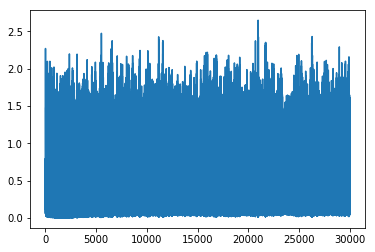

In [63]:
plt.plot(np.arange(len(cost_history)-10), cost_history[10:])